# Bibliography data

## Import libraries and styles for data visualization

In [25]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

## High-level descriptive information

Load the dataset:

In [2]:
df = pd.read_csv('data/bibliografia.csv', delimiter='|', encoding='ISO-8859-1')

Drop `DataOraModifica` column:

In [3]:
df = df.drop('DataOraModifica', axis=1)

Look at the first five and the last five rows in the dataset:

In [4]:
df.head()

,IdBibliografia,Autore,Titolo,DescrizioneOpera,Sede,Annata,LuogoPubblicazione,Anno,CuratoreEdizione,CasaEditrice,ISBN,Pagine,EdizioniSuccessive,VolPiuVol
0,1,Ricci L.,Alcuni cenni storici di Cusercoli: omaggio al ...,NaN,NaN,NaN,Castelplanio,1904,NaN,Premiata Tipografia Editrice Romagnoli,NaN,NaN,NaN,NaN
1,2,Zampa R.,Il castello e la chiesa di Polenta nella provi...,NaN,NaN,NaN,Milano,1891,NaN,Premiata Tipografia e Litografia degli Ingegneri,NaN,NaN,NaN,NaN
2,3,Zambotti B.,Diario Ferrarese dell'anno 1476 sino al 1504: ...,NaN,RR.II.SS.,XXIV/VII/II,Bologna,1934-1937,Pardi G.,Zanichelli N.,NaN,NaN,NaN,NaN
3,4,Zaghini F.,"Fiumana, l'abbazia, il paese e la parrocchia",NaN,NaN,NaN,Forlì,1996,NaN,Valbonesi Tipografia,NaN,NaN,NaN,NaN
4,5,Zaccaria G.,Meldola un castello una città: notizie storich...,NaN,NaN,NaN,Forlì,1969,NaN,Raffaelli Tipografia,NaN,NaN,2. ed.,NaN


In [5]:
df.tail()

,IdBibliografia,Autore,Titolo,DescrizioneOpera,Sede,Annata,LuogoPubblicazione,Anno,CuratoreEdizione,CasaEditrice,ISBN,Pagine,EdizioniSuccessive,VolPiuVol
1149,1186,Baricchi W.,Le mura di Reggio Emilia - L'età contemporanea,"Contributo in ""La cerchia Scomparsa, Reggio Em...",NaN,NaN,Reggio Emilia,2007,NaN,Grafitalia,NaN,175,NaN,NaN
1150,1187,Gamberini A.,Reggio e le sue mura in età comunale e princip...,"Contributo in ""La Cerchia Scomparsa, Reggio e ...",NaN,NaN,Reggio Emilia,2007,NaN,Grafitalia,NaN,175,NaN,NaN
1151,1188,Gelichi S. - Curina R.,Le mura inesistenti? Il perimetro urbano della...,"Contributo nel catalogo ""La Cerchia Scomparsa,...",NaN,NaN,NaN,2007,NaN,Grafitalia,NaN,175,NaN,NaN
1152,1189,Bianchini M.,Urbs e civitas. Per la storia di un'identità:...,"In ""La Cerchia Scomparsa, Reggio e le sue Mura...",NaN,NaN,Reggio Emilia,2007,NaN,Grafitalia,NaN,175,NaN,NaN
1153,1190,Archivio di Stato di Reggio E.,"Comune,Consigli, Provvigioni del Consiglio gen...","1309-1329, regg.28 membranacei.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Get general information about the dataset, including the number of rows and columns, the columns' headings and datatypes:

In [6]:
df.shape

(1154, 14)

In [7]:
df.columns

Index(['IdBibliografia', 'Autore', 'Titolo', 'DescrizioneOpera', 'Sede',
       'Annata', 'LuogoPubblicazione', 'Anno', 'CuratoreEdizione',
       'CasaEditrice', 'ISBN', 'Pagine', 'EdizioniSuccessive', 'VolPiuVol'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   IdBibliografia      1154 non-null   int64 
 1   Autore              999 non-null    object
 2   Titolo              1154 non-null   object
 3   DescrizioneOpera    5 non-null      object
 4   Sede                503 non-null    object
 5   Annata              465 non-null    object
 6   LuogoPubblicazione  926 non-null    object
 7   Anno                1141 non-null   object
 8   CuratoreEdizione    342 non-null    object
 9   CasaEditrice        853 non-null    object
 10  ISBN                53 non-null     object
 11  Pagine              471 non-null    object
 12  EdizioniSuccessive  24 non-null     object
 13  VolPiuVol           153 non-null    object
dtypes: int64(1), object(13)
memory usage: 126.3+ KB


### Duplicated data 

Check for duplicated values:

In [9]:
print(df.duplicated().sum())

0


In [10]:
df.nunique()

IdBibliografia        1154
Autore                 561
Titolo                1112
DescrizioneOpera         5
Sede                   204
Annata                 197
LuogoPubblicazione     134
Anno                   304
CuratoreEdizione       227
CasaEditrice           415
ISBN                    42
Pagine                 295
EdizioniSuccessive       8
VolPiuVol               16
dtype: int64

### Data sparsity

Check NULL data:

In [11]:
df.isnull().sum()

IdBibliografia           0
Autore                 155
Titolo                   0
DescrizioneOpera      1149
Sede                   651
Annata                 689
LuogoPubblicazione     228
Anno                    13
CuratoreEdizione       812
CasaEditrice           301
ISBN                  1101
Pagine                 683
EdizioniSuccessive    1130
VolPiuVol             1001
dtype: int64

<Axes: >

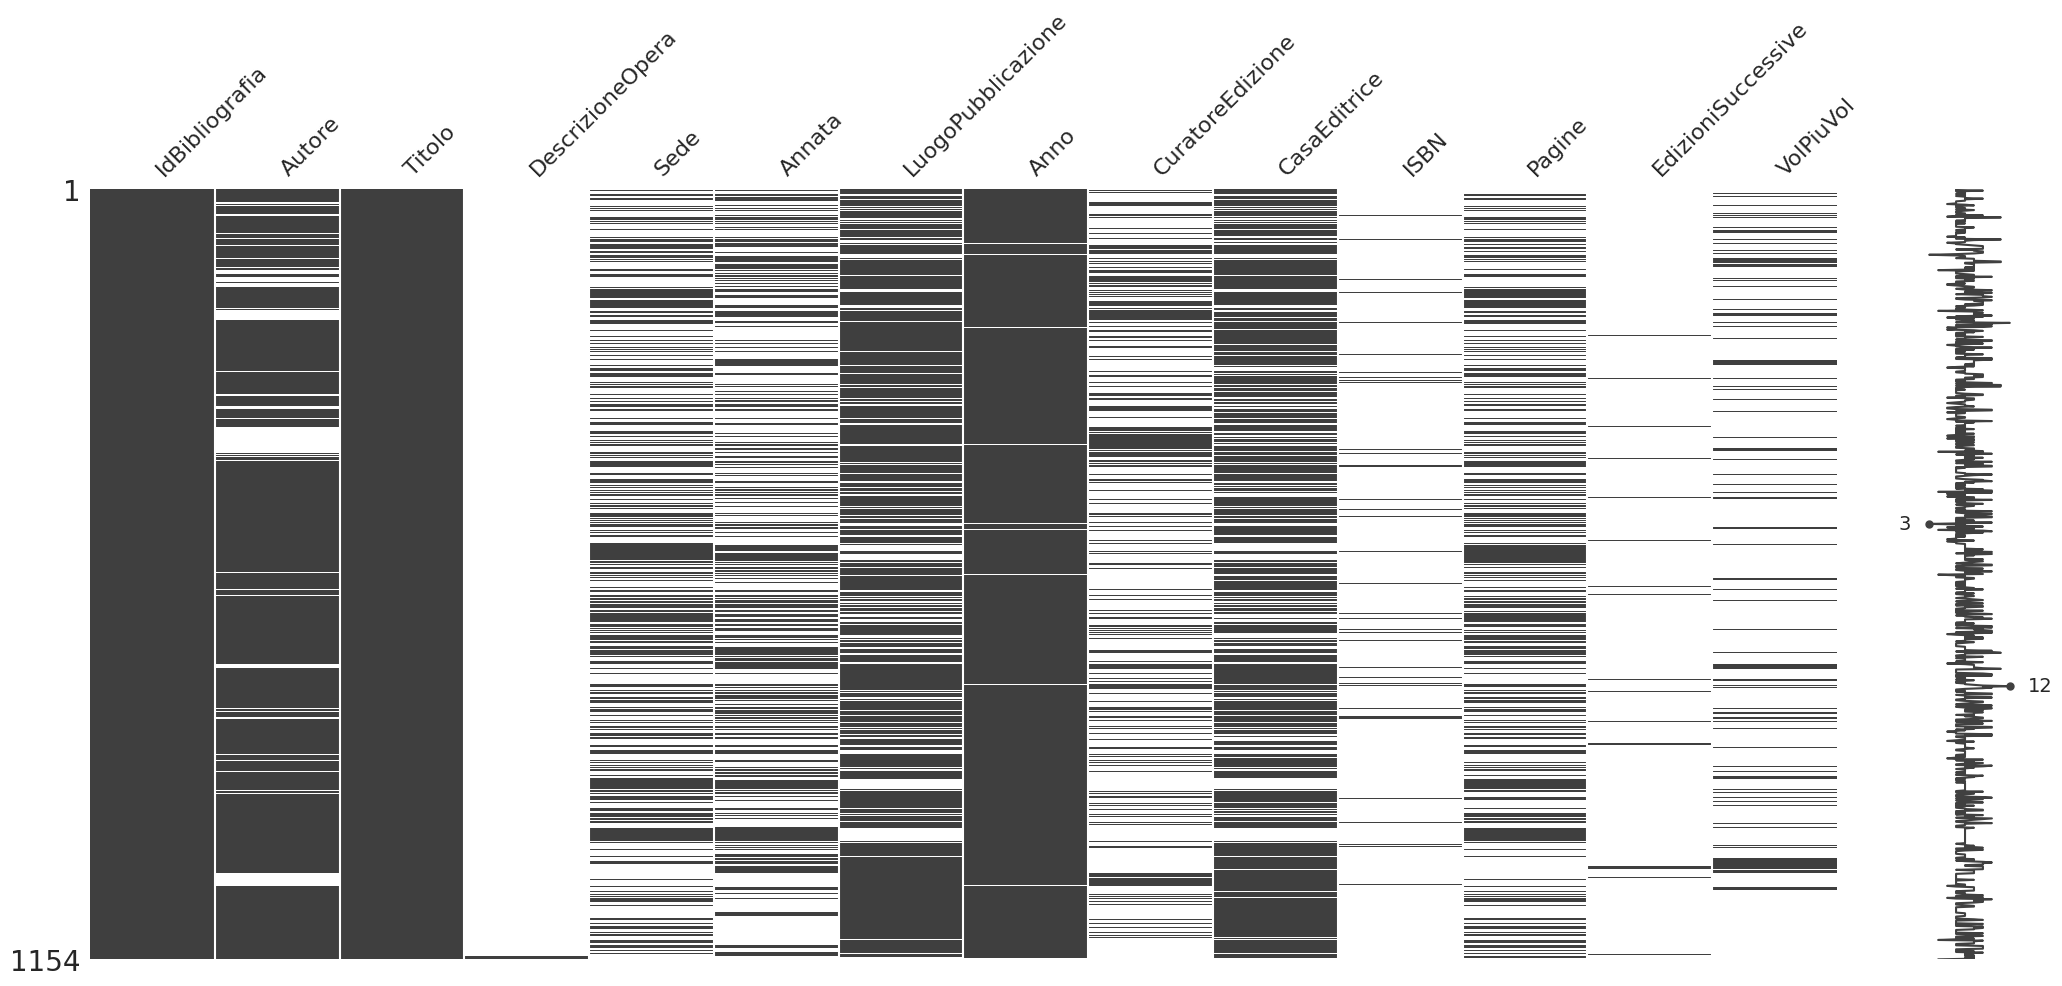

In [12]:
msno.matrix(df)

<Axes: >

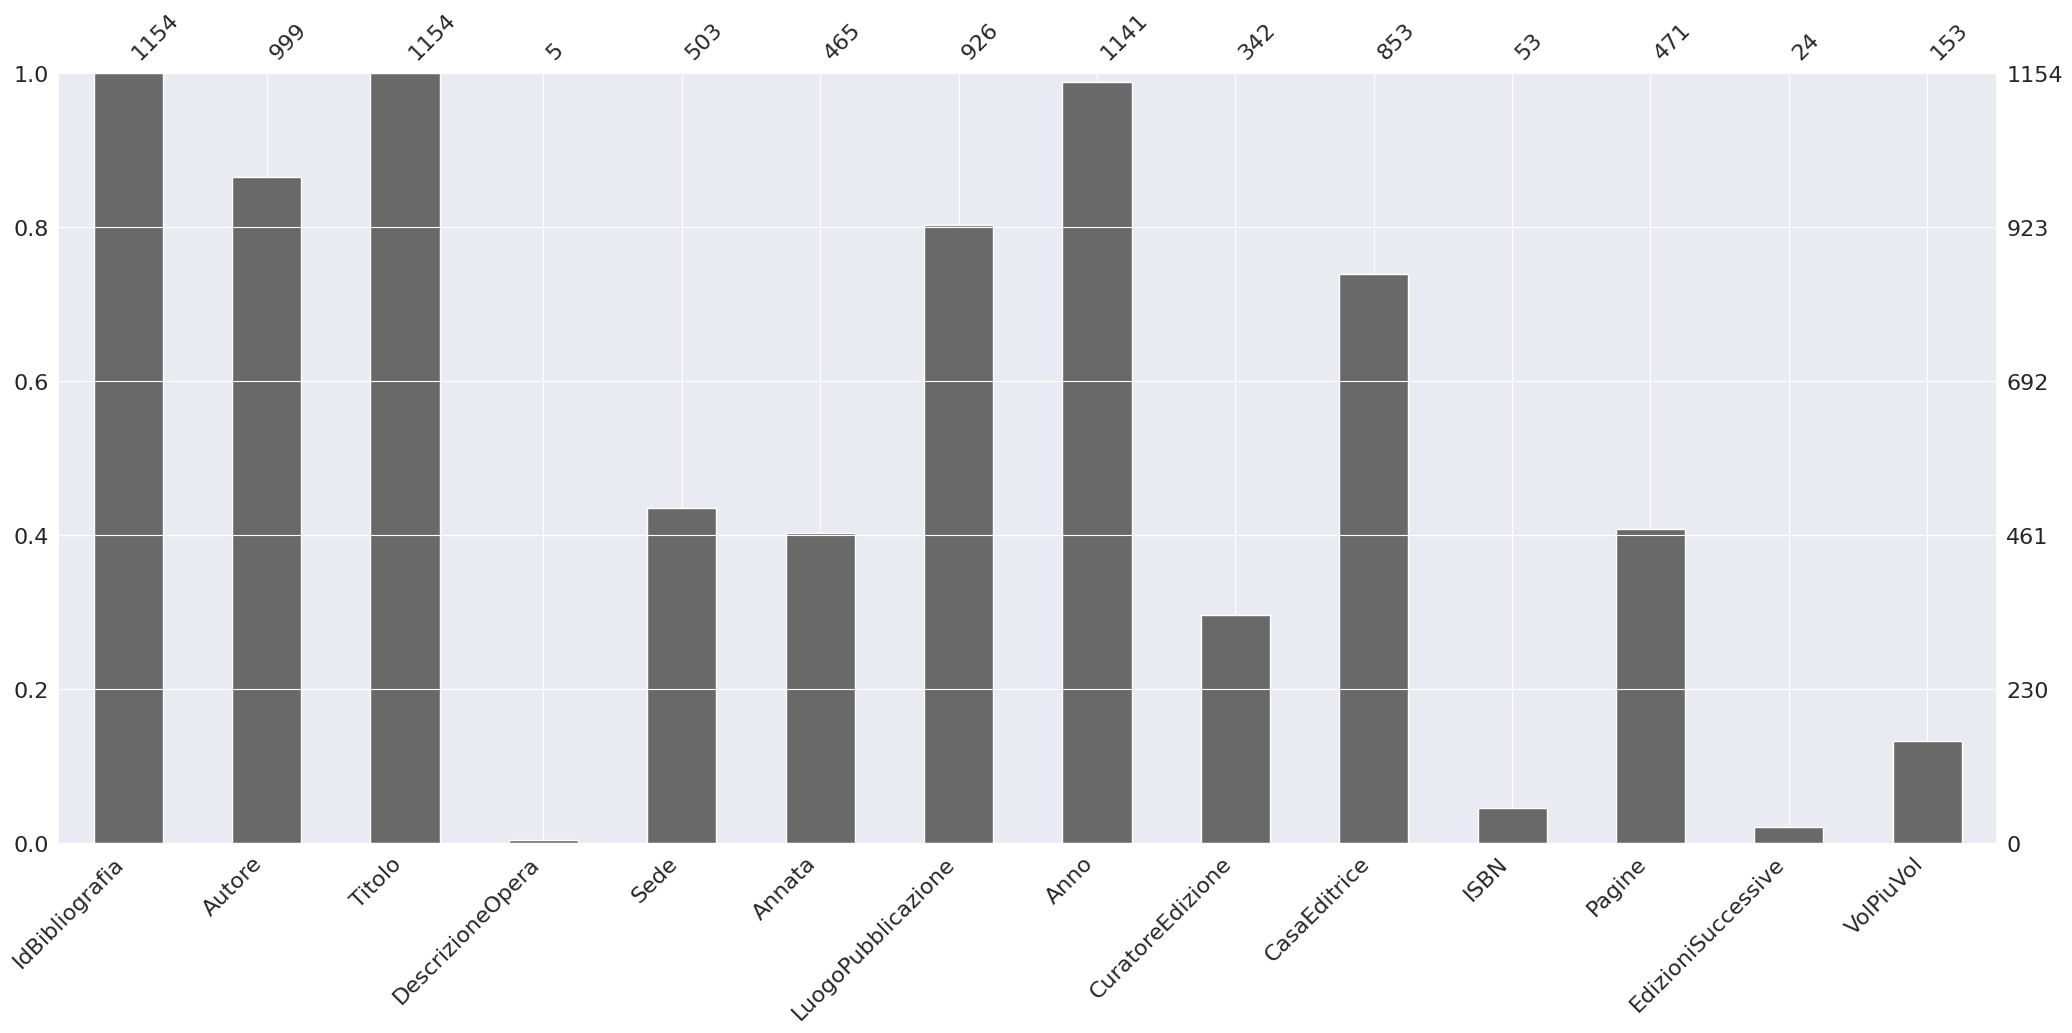

In [13]:
msno.bar(df)

## Detailed analysis per column

### `Autore`

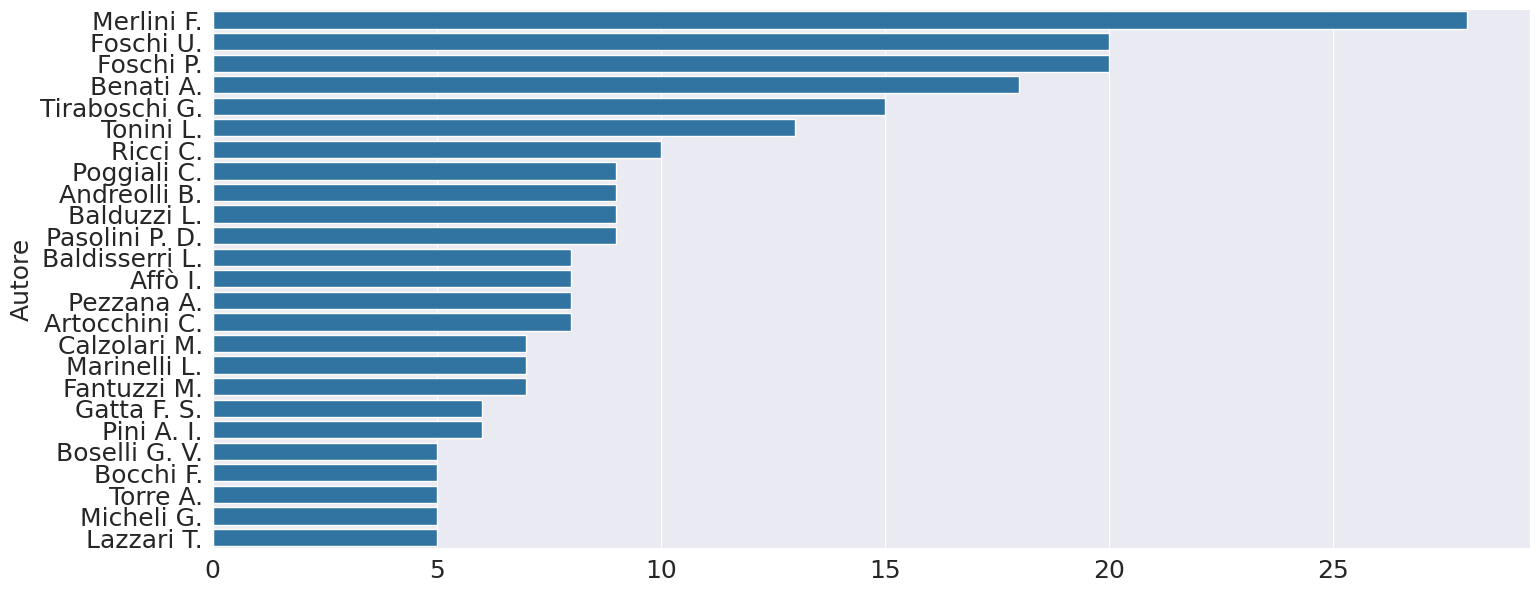

In [14]:
author_counts = df['Autore'].value_counts().head(25)
sns.barplot(y=author_counts.index, x=author_counts.values)
plt.show()

### `Sede`

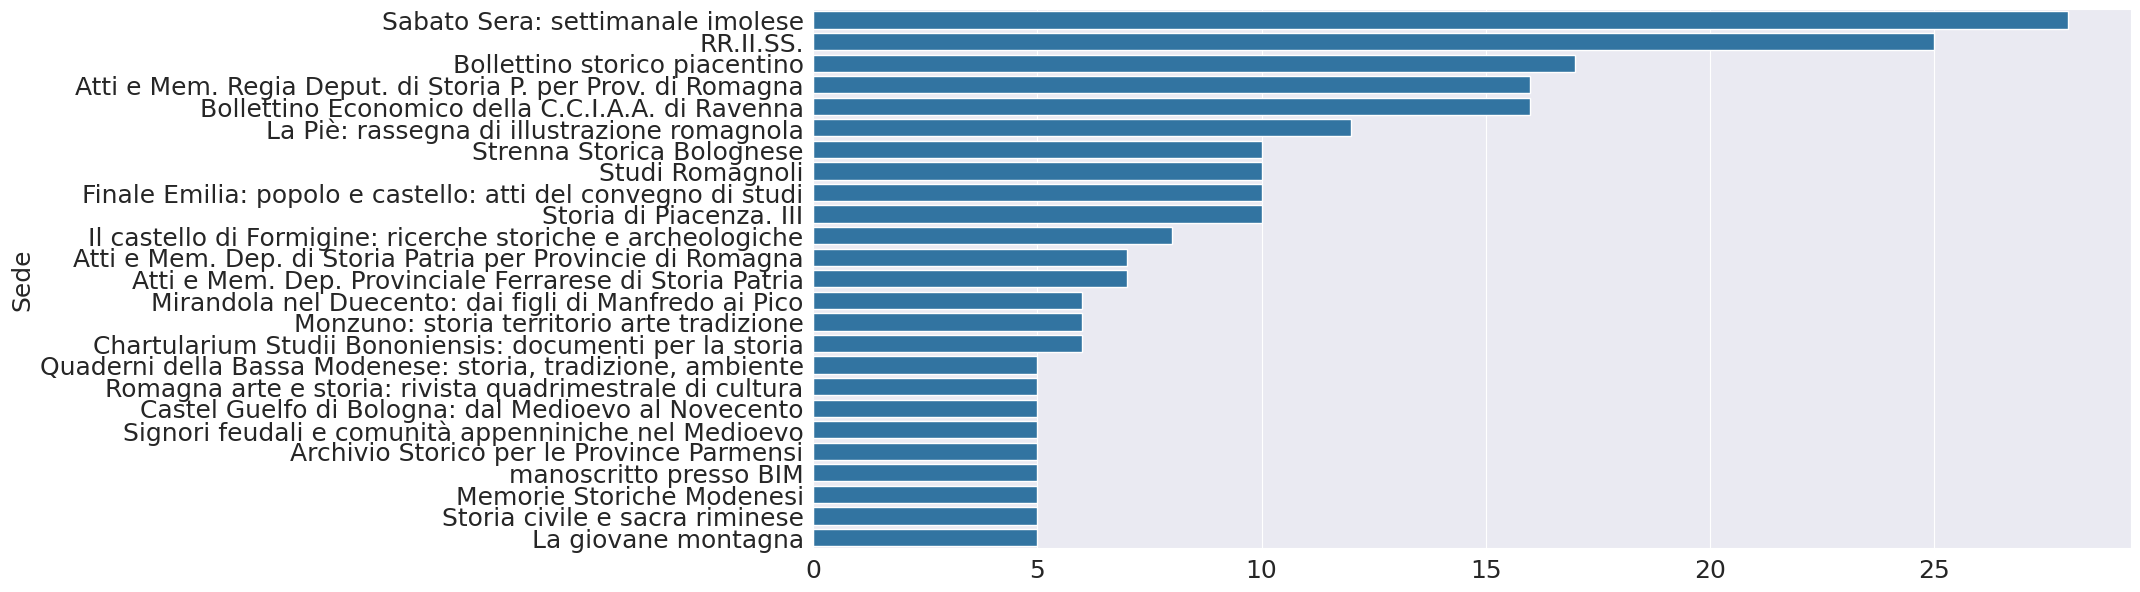

In [15]:
volume_counts = df['Sede'].value_counts().head(25)
sns.barplot(y=volume_counts.index, x=volume_counts.values)
plt.show()

### `Annata`

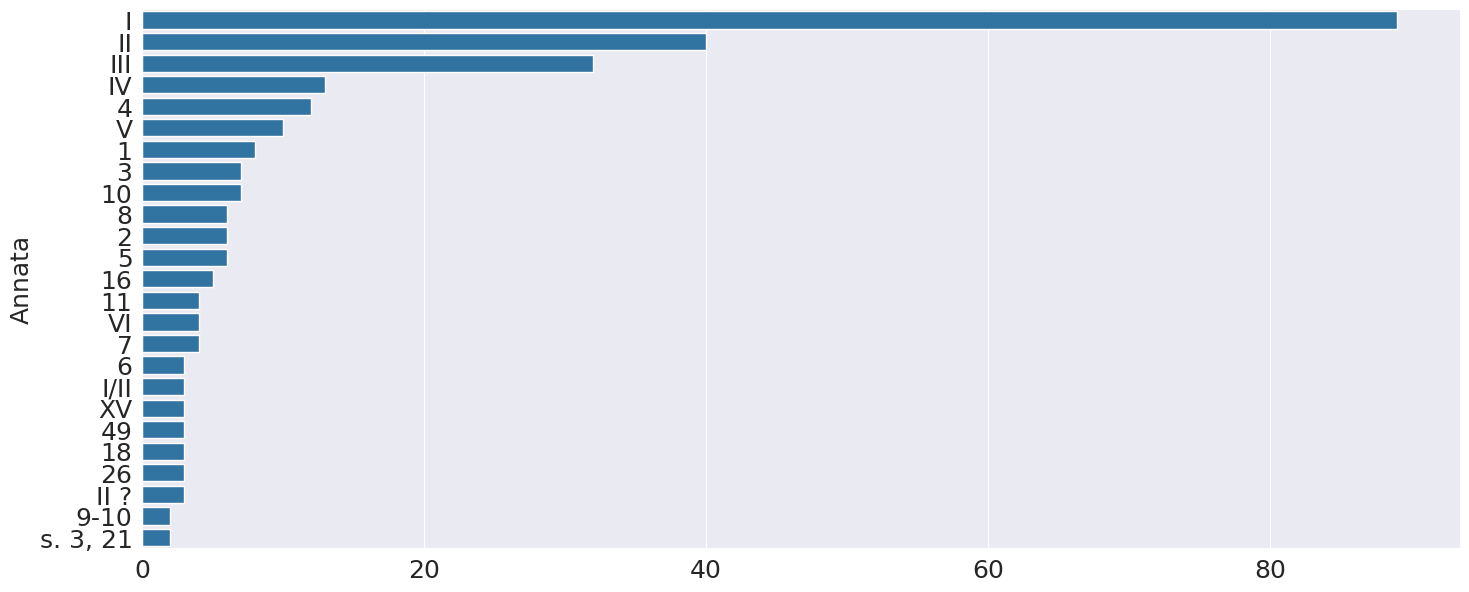

In [16]:
volnumber_counts = df['Annata'].value_counts().head(25)
sns.barplot(y=volnumber_counts.index, x=volnumber_counts.values)
plt.show()

### `LuogoPubblicazione`

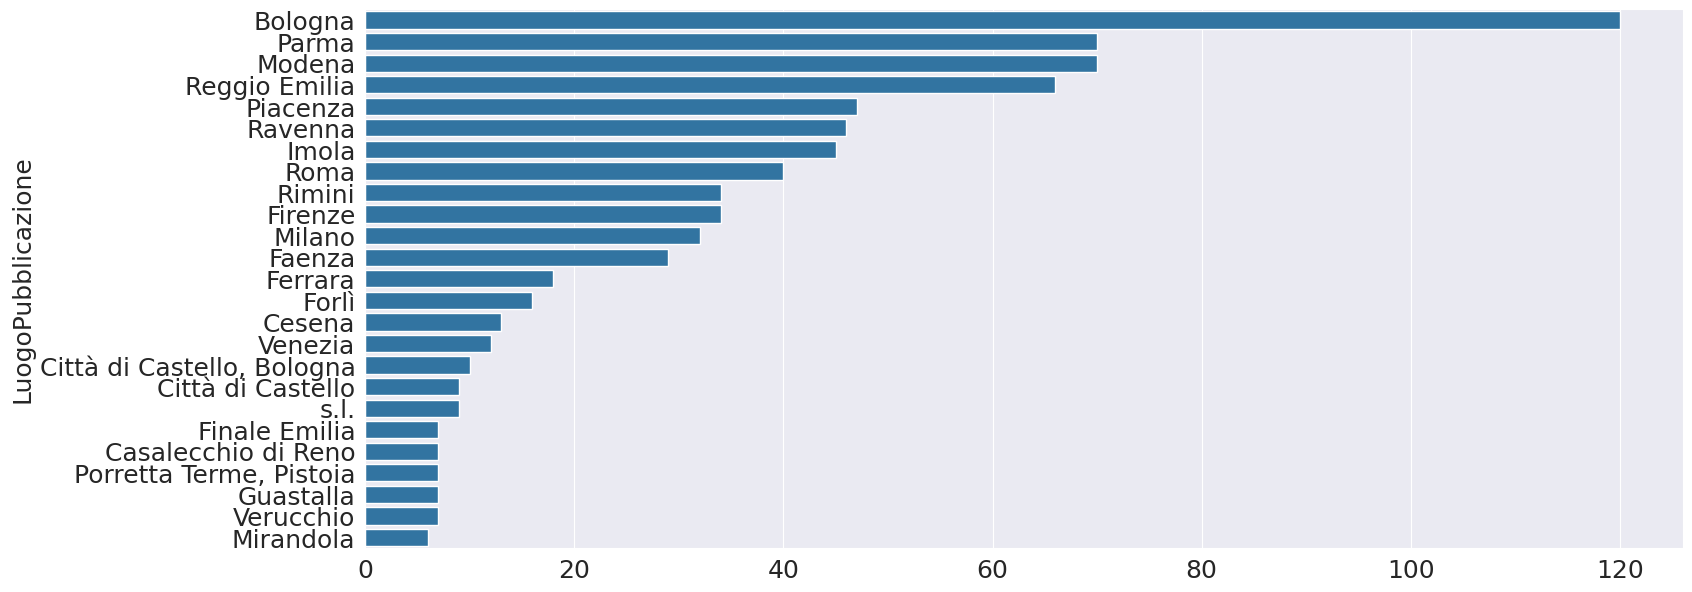

In [17]:
pubplace_counts = df['LuogoPubblicazione'].value_counts().head(25)
sns.barplot(y=pubplace_counts.index, x=pubplace_counts.values)
plt.show()

### `Anno`

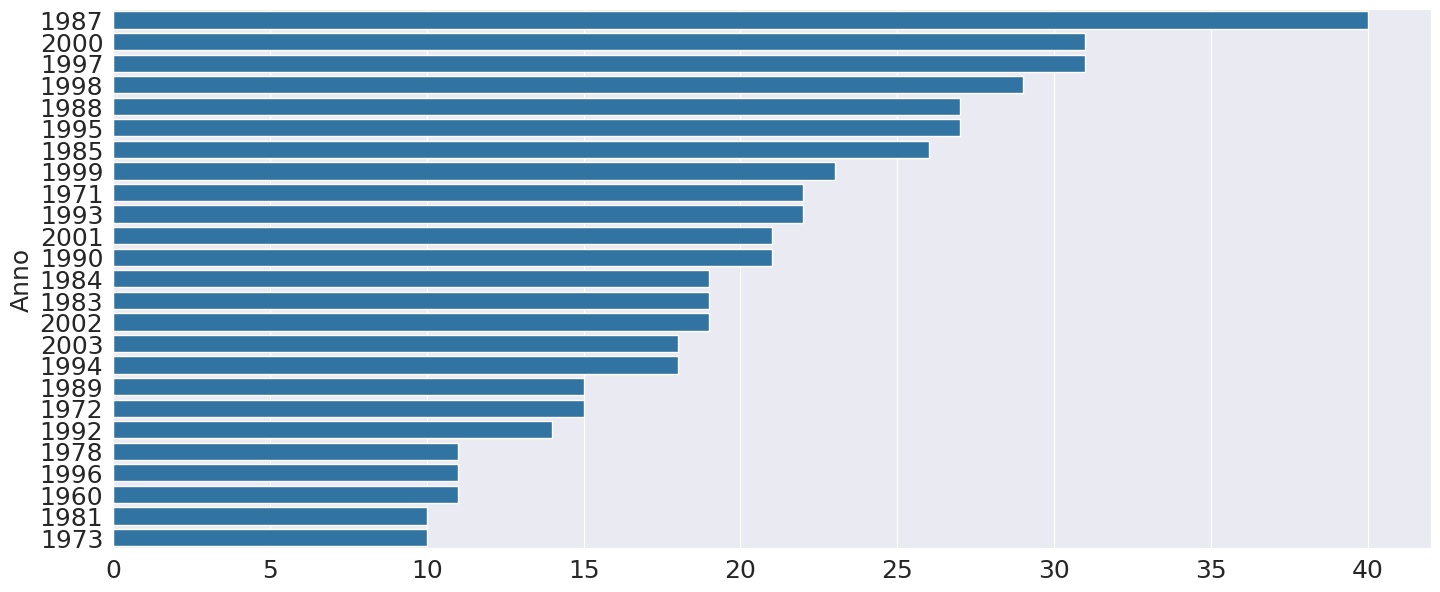

In [18]:
pubyear_counts = df['Anno'].value_counts().head(25)
sns.barplot(y=pubyear_counts.index, x=pubyear_counts.values)
plt.show()

### `CuratoreEdizione`

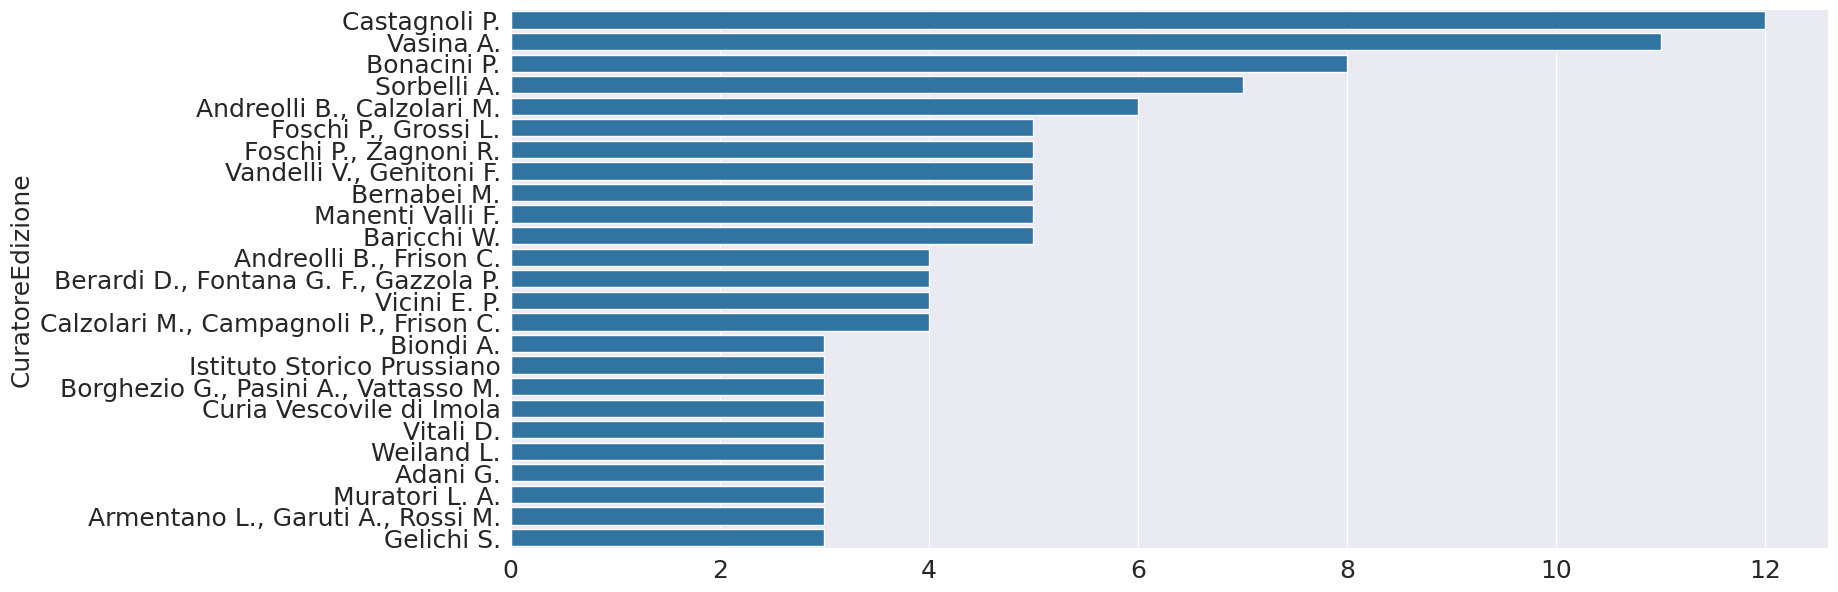

In [19]:
pubcurator_counts = df['CuratoreEdizione'].value_counts().head(25)
sns.barplot(y=pubcurator_counts.index, x=pubcurator_counts.values)
plt.show()

### `CasaEditrice`

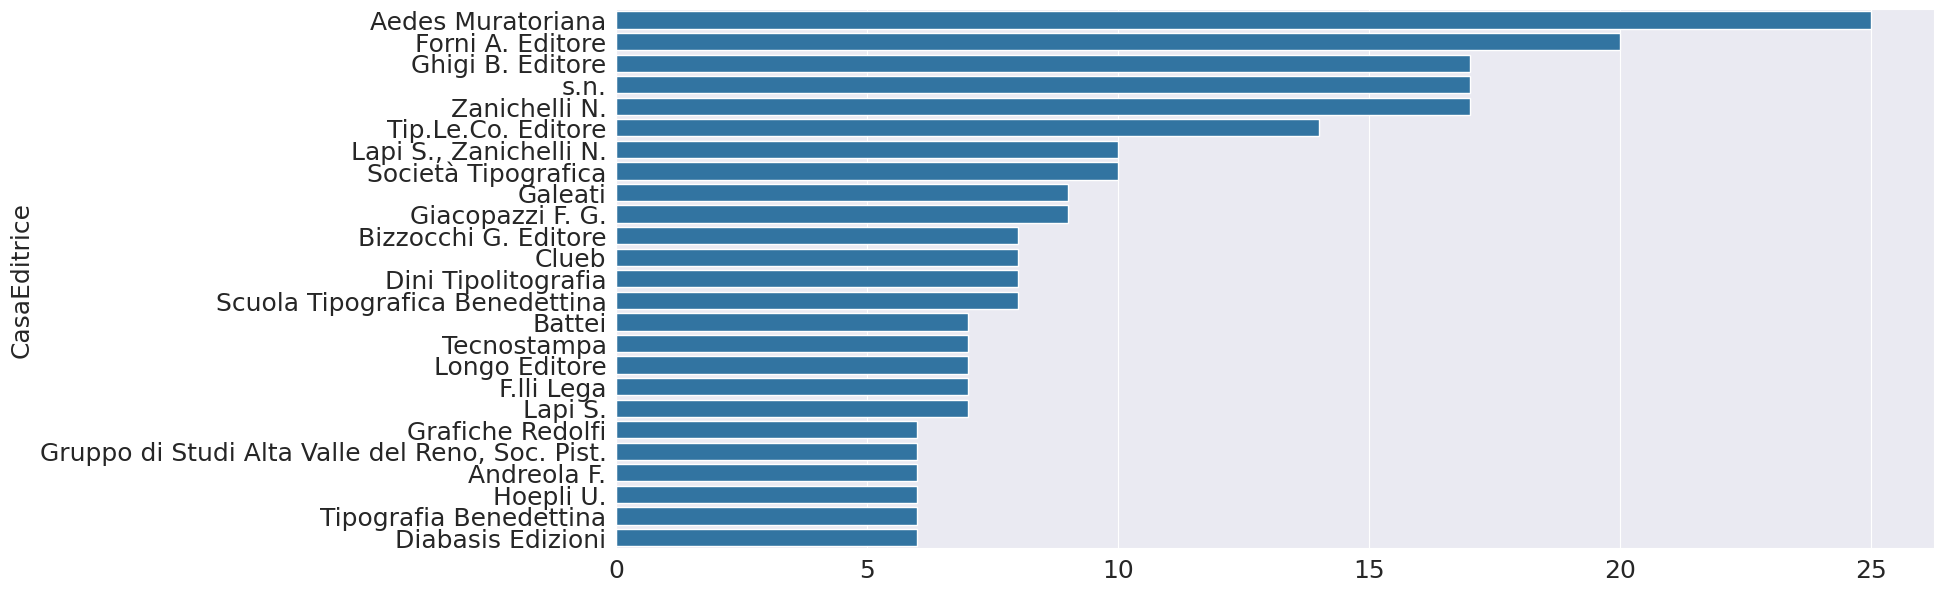

In [20]:
publisher_counts = df['CasaEditrice'].value_counts().head(25)
sns.barplot(y=publisher_counts.index, x=publisher_counts.values)
plt.show()

### `ISBN`

In [21]:
title_isbn = df[['Titolo', 'ISBN']]
title_isbn = title_isbn[title_isbn['ISBN'].notna()]
title_isbn

,Titolo,ISBN
37,Viaggio fra le rocche e i castelli della provi...,8880632116
39,Storia di Ferrara. Il Basso Medioevo XII-XIV,8885668186
75,Istituzioni plebane e castrensi nei secoli IX-XI,8885668186
135,Gli scavi nel castello di Coriano,8871892763
145,Poggio Berni: note per una storia,8838795843
155,I restauri e la riscoperta del palazzo (1863-1...,8843568655
181,Cervia: natura e storia,8838792348
200,Nella tradizione di città capitale: presenza g...,8831756796
202,"La ""costruzione"" di un territorio di confine: ...",8883420411
211,Storia di Montepetra e dintorni,8883120426


### `Pagine`

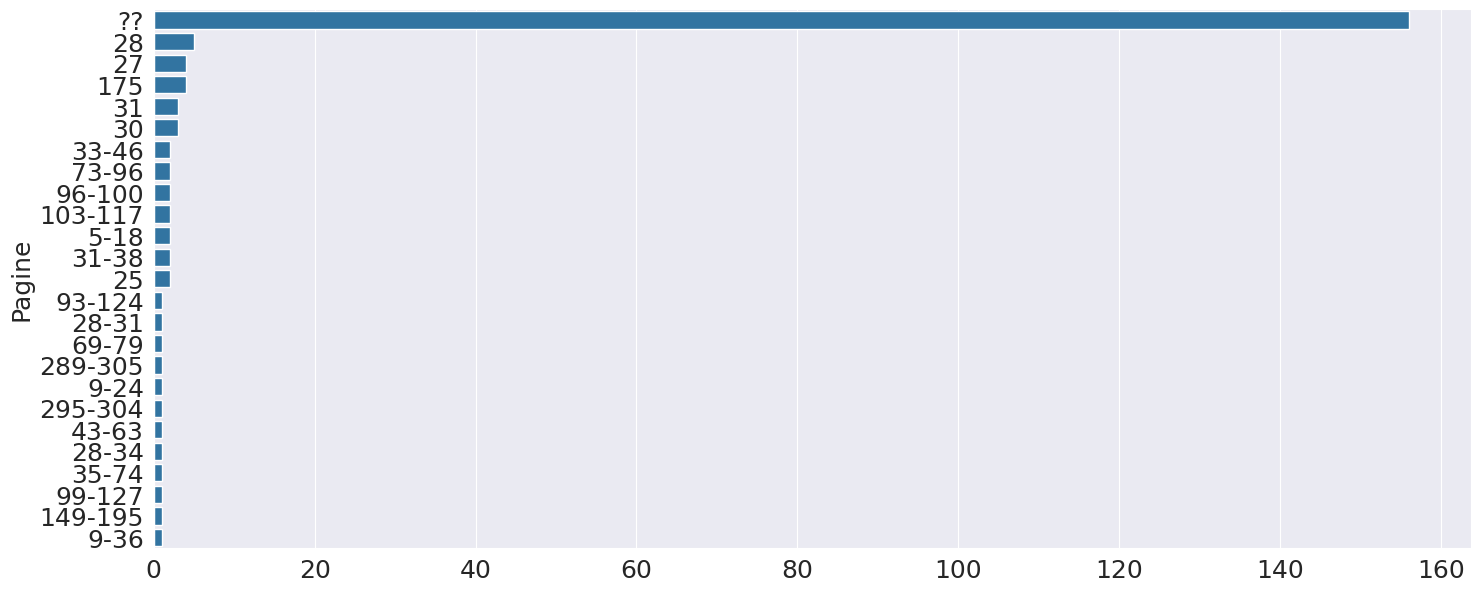

In [22]:
pages_counts = df['Pagine'].value_counts().head(25)
sns.barplot(y=pages_counts.index, x=pages_counts.values)
plt.show()

### `EdizioniSuccessive`

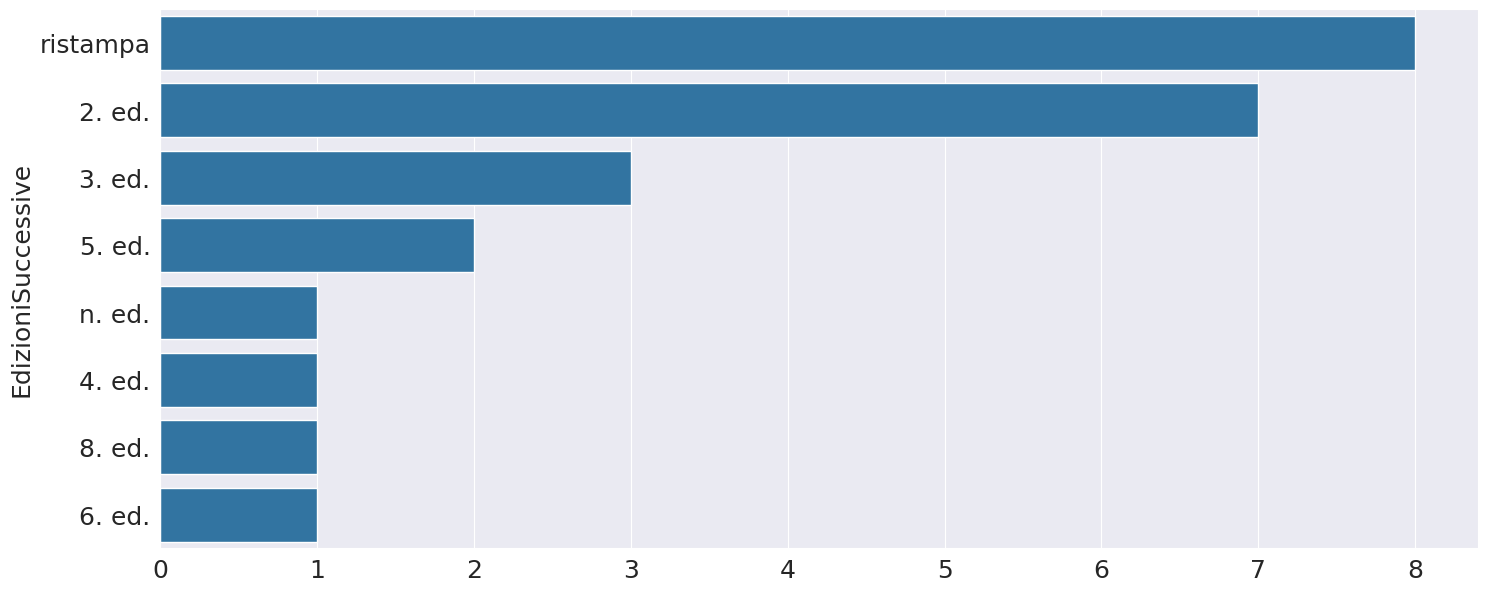

In [23]:
editions_counts = df['EdizioniSuccessive'].value_counts()
sns.barplot(y=editions_counts.index, x=editions_counts.values)
plt.show()

### `VolPiuVol`

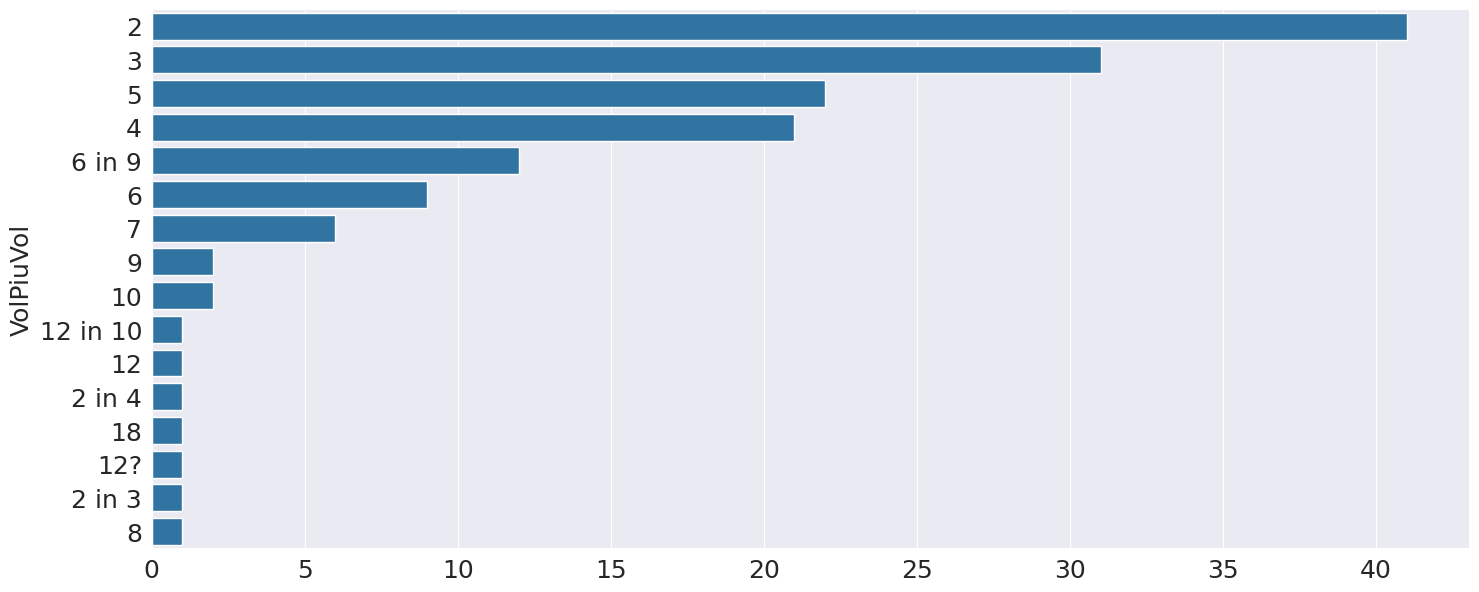

In [24]:
volpiuvol_counts = df['VolPiuVol'].value_counts()
sns.barplot(y=volpiuvol_counts.index, x=volpiuvol_counts.values)
plt.show()

## Observations

* Normalize NULL values
* People's names in `Autore` and `CuratoreEdizione` should be complete (and possibly divided into `Family name`, `First name`)
* Is `DescrizioneOpera` useful? Should it be dropped?
* What is `Sede`? Should it have normalized forms?
* What is `Annata`? It should be normalized (e.g. only integers)
* `Anno` should be normalized when possible (presence of periods)
* Should `CasaEditrice` be normalized?
* Can missing `ISBN` values be extracted automatically somehow?
* Is `EdizioniSuccessive` useful? Should it be dropped?
* What is `VolPiuVol`?